**Proyecto Tutorial K-Medias**

- Comprender un dataset nuevo.
- Modelar los datos utilizando un K-Means.
- Analizar los resultados y entrenar un modelo supervisado.

**🌱 Cómo iniciar este proyecto**

Sigue las siguientes instrucciones:

- Crea un nuevo repositorio basado en el proyecto de Machine Learning o haciendo clic aquí.
- Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
- Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.
**🚛 Cómo entregar este proyecto**

Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

**📝 Instrucciones**
Sistema de agrupación de casas
Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

- Paso 1: Carga del conjunto de datos
El conjunto de datos se puede encontrar en esta carpeta de proyecto bajo el nombre housing.csv. Puedes cargarlo en el código directamente desde el siguiente enlace:

https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv
O descargarlo y añadirlo a mano en tu repositorio. En este caso solo nos interesan las columnas Latitude, Longitude y MedInc.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en lecciones anteriores. Aunque estos conjuntos no se utilicen para obtener estadísticas, podrás utilizarlos para entrenar el algoritmo no supervisado y luego para hacer predicciones sobre puntos nuevos para predecir el cluster al que se asocian.

- Paso 2: Construye un K-Means
Clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means. A continuación, almacena el cluster al que pertenece cada casa como una columna nueva del dataset. Podrías llamarla cluster. Para introducirla a tu conjunto de datos quizá tengas que categorizarla. Observa qué formato y valores tiene y actúa en consecuencia. Grafícala en un diagrama de puntos y describe lo que ves.

- Paso 3: Predice con el conjunto de test
Ahora utiliza el modelo entrenado con el conjunto test y añade los puntos al gráfico anterior para confirmar que la predicción es satisfactoria o no.

- Paso 4: Entrena un modelo de clasificación supervisada
Ahora que el K-Means nos ha devuelto una categorización (agrupación) de los puntos para los conjuntos de entrenamiento y prueba, estudia qué modelo podría ser más útil y entrénalo. Obtén las estadísticas y describe lo que ves.

Este flujo es muy común cuando contamos con datos no etiquetados: utilizar un modelo de aprendizaje no supervisado para etiquetarlos de forma automática y a continuación, un modelo de aprendizaje supervisado.

- Paso 5: Guarda los modelos
Almacena ambos modelos en la carpeta correspondiente.

Nota: También incorporamos muestras de solución en ./solution.ipynb que te sugerimos honestamente que solo uses si estás atascado por más de 30 minutos o si ya has terminado y quieres compararlo con tu enfoque.

## Imports

In [137]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import pickle
from yellowbrick.cluster import KElbowVisualizer

## Limpieza de datos

In [138]:
df = pd.read_csv("/workspaces/machine-learning-elius123ef/data/raw/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Eliminamos las columnas que no nos interesa

In [139]:
df = df.drop(["MedHouseVal",	"HouseAge",	"AveRooms",	"AveBedrms",	"Population",	"AveOccup"], axis=1)
df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


### Buscamos valores nulos o duplicados

In [140]:
df.duplicated().sum()

np.int64(5)

In [141]:
df.drop_duplicates(inplace=True)


In [142]:
df.duplicated().sum()

np.int64(0)

In [143]:
df.isnull().sum()

MedInc       0
Latitude     0
Longitude    0
dtype: int64

In [144]:
X = df

## Escalado


In [145]:
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

X_robust_scaler = pd.DataFrame(X, columns=['longitude', 'latitude', 'MedInc'])
X_robust_scaler

,longitude,latitude,MedInc
0,2.197981,0.957672,-0.986807
1,2.187061,0.952381,-0.984169
2,1.708052,0.949735,-0.989446
3,0.967378,0.949735,-0.992084
4,0.142923,0.949735,-0.992084
...,...,...,...
20630,-0.905896,1.380952,-0.686016
20631,-0.448681,1.383598,-0.717678
20632,-0.841799,1.367725,-0.720317
20633,-0.765084,1.367725,-0.746702


## Modelo no supervisado

### revisar

El gráfico 3D nos permite analizar la separación y distribución de las clases en función de las combinaciones de las 3 variables.
fig = px.scatter_3d(df,
                    x="Latitude",
                    y="Longitude",
                    z="MedHouseVal",
                    width=1000,
                    height=500,
                    color_discrete_sequence=["#E58139", "#39E581", "#8139E5"])
camera = dict(up=dict(x=1, y=3.5, z=0),
              eye=dict(x=2, y=0, z=0))

fig.update_layout(scene_camera=camera)
fig.show()

### K means

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

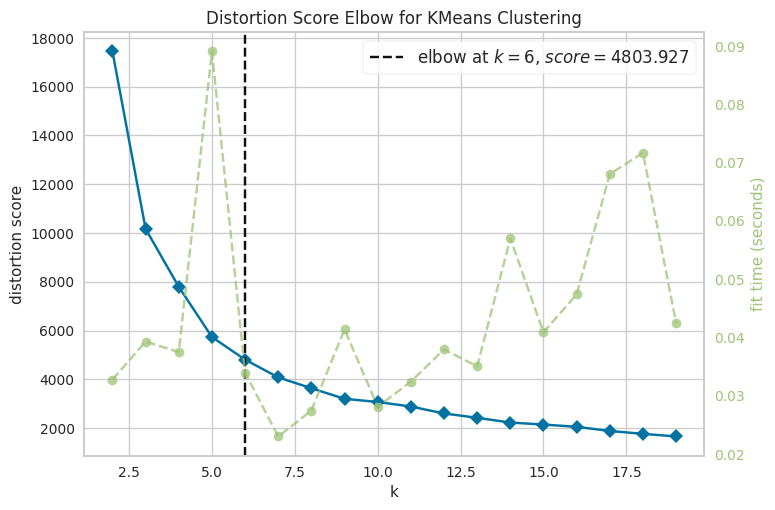

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [146]:
elbow_vis = KElbowVisualizer(KMeans(random_state=18), k=(2, 20))
elbow_vis.fit(X)
elbow_vis.show()

In [147]:
km_model = KMeans(n_clusters=6, random_state=18)
km_model.fit(X_robust_scaler)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,18
,copy_x,True
,algorithm,'lloyd'


In [148]:
df['cluster'] = km_model.fit_predict(X)
df

,MedInc,Latitude,Longitude,cluster
0,8.3252,37.88,-122.23,1
1,8.3014,37.86,-122.22,1
2,7.2574,37.85,-122.24,1
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,5
...,...,...,...,...
20635,1.5603,39.48,-121.09,5
20636,2.5568,39.49,-121.21,5
20637,1.7000,39.43,-121.22,5
20638,1.8672,39.43,-121.32,5


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

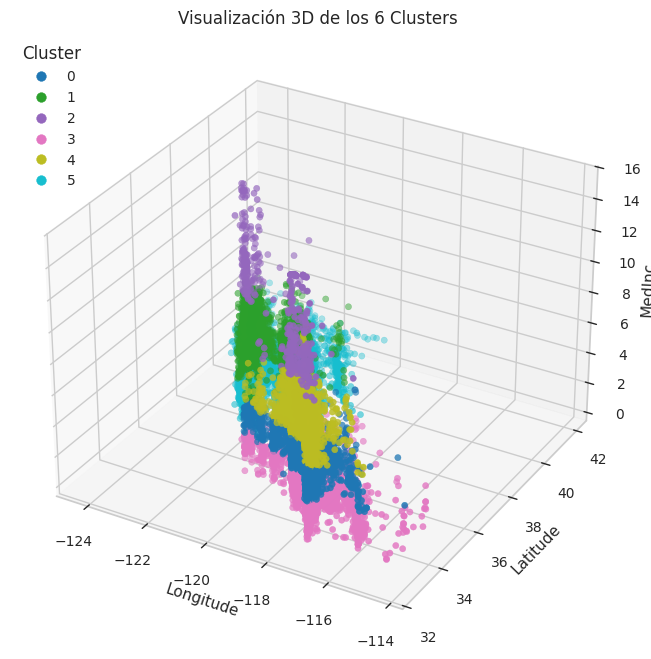

In [149]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

x = df['Longitude']
y = df['Latitude']
z = df['MedInc']
c = df['cluster']

scatter = ax.scatter(x, y, z, c=c, cmap='tab10')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')
ax.set_title('Visualización 3D de los 6 Clusters')

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc='upper left')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

(np.float64(-13898461.064521791),
 np.float64(-12669048.60820088),
 np.float64(3768450.223789852),
 np.float64(5219447.026721441))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

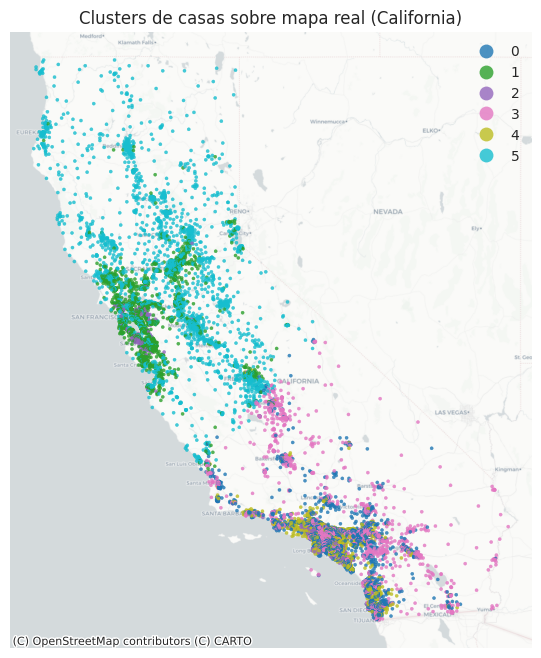

In [150]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs='EPSG:4326')

gdf = gdf.to_crs(epsg=3857)

ax = gdf.plot(figsize=(10, 8),
              column='cluster',
              categorical=True,
              legend=True,
              cmap='tab10',
              markersize=5,
              alpha=0.8)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Clusters de casas sobre mapa real (California)")
plt.axis('off')

### Calculamos ingreso medio por cluster

In [151]:
inc_mean = df.groupby('cluster')['MedInc'].mean().sort_index()
inc_mean

cluster
0     4.185683
1     5.301413
2    10.921274
3     2.379776
4     6.487549
5     2.720194
Name: MedInc, dtype: float64

/tmp/ipykernel_12707/3693421243.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
fi

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

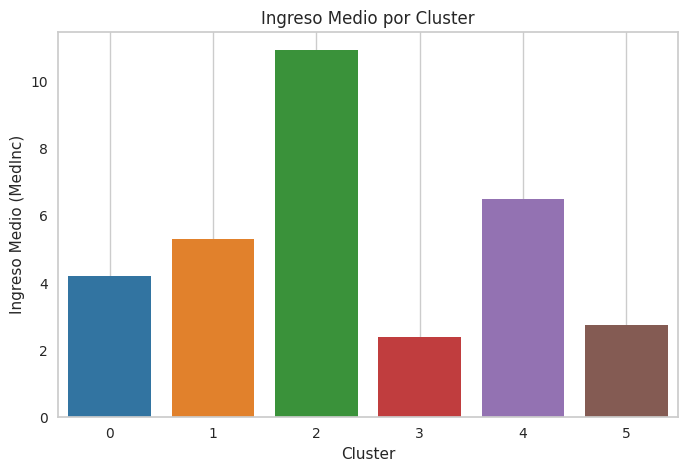

In [153]:
plt.figure(figsize=(8, 5))
sns.barplot(x=inc_mean.index, y=inc_mean.values, palette='tab10')
plt.title('Ingreso Medio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ingreso Medio (MedInc)')
plt.grid()
plt.show()

### Split X , y

In [157]:
X =  df.drop('cluster', axis=1)
y = df['cluster'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

### Modelo

In [158]:
rf_model = RandomForestClassifier(random_state=21)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [159]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9949115580324691

### Guardamos el modelo 

In [160]:
with open('../models/09-rf-model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('../models/09-km-model.pkl', 'wb') as f:
    pickle.dump(km_model, f)